<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/yolox/Train_and_Debug_YOLOX_Models_with_Weights_&_Biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{yolox-colab} -->

<img src="https://raw.githubusercontent.com/Megvii-BaseDetection/YOLOX/main/assets/logo.png">


<!--- @wandbcode{yolox-colab} -->

<img src="http://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />

# Train and Debug YOLOX Models with Weights & Biases  🪄🐝

In this colab, we'll demonstrate how to use the [W&B integration](https://docs.wandb.ai/guides/integrations/other/yolox) with [YOLOX](https://github.com/Megvii-BaseDetection/YOLOX) for real-time object detection framework to track model metrics, log checkpoints and visualize predictions.

It can be done with just **1** added argument to your command!



```
python tools/train.py -n yolox-s -d 8 -b 64 --fp16 -o [--cache] --logger wandb
```



To log the metrics and checkpoints to W&B during training, the wandb client now has a direct integration into YOLOX. Using wandb for logging automatically adds all the metrics to your W&B dashboard, saves the models at every evaluation step , tags the model with the best average precision and shows you visualizations of the predicted bounding boxes along with the confidence score!


# Setup  🖥

We begin by downloading the [YOLOX GitHub repository](https://github.com/Megvii-BaseDetection/YOLOX) and a subset of the [COCO dataset](https://cocodataset.org/#overview) for object detection.

Below, we'll use this dataset to train a model to detect objects in images.

We also install all the requirements for YOLOX and `wandb`.

In [ ]:
%%shell
git clone --depth 1 https://github.com/manangoel99/YOLOX
cd YOLOX
git config --global user.name "Manan Goel"
git config --global user.email "manangoel1999@gmail.com"
git checkout -b WandbTables; git pull origin WandbTables; pip install -e .
pip install wandb -qqq

In [ ]:
import wandb

In [ ]:
wandb.login()

## Downloading the dataset

In [ ]:
api = wandb.Api()
artifact = api.artifact("manan-goel/YOLOX-coco/coco128:latest", type="dataset")
artifact_dir = artifact.download(root="/content")

In [ ]:
%%shell
unzip coco128.zip
mv /content/coco128 /content/YOLOX/datasets/COCO
cd /content/YOLOX

In [ ]:
%cd YOLOX

# Training 🏋️

Using wandb just requires configuring the command line argument `--logger wandb`. This automatically turns on the wandb logger for your experiment and further arguments can be added -


1.   `wandb-project`: To specify the project in which experiment is being run.
2.   `wandb-run`: The name of the wandb run
3.   `wandb-entity`: Entity which is starting the run
4.   `wandb-log_checkpoints`: True/False to log model checkpoints to the wandb dashboard
5.   `wandb-num_eval_images`: Number of images from the validation set to be logged to wandb. Predictions corresponding to these can be visualized on the dashboard. No images are logged if the value is 0 and all are logged if the value is -1.

and more!




## Reproduce the results

The different YOLOX models can be trained from scratch with the entire process being logged to W&B. In this case we train on a much smaller subset of the COCO dataset.

In [ ]:
%%shell
python -m yolox.tools.train -n yolox-nano -d 1 -b 64 --fp16 --logger wandb \
    wandb-project yolox-colab \
    wandb-log_checkpoints True \
    wandb-num_eval_images 3 \
    eval_interval 1 \
    print_interval 1 \
    max_epoch 10

[This W&B dashboard](https://wandb.ai/manan-goel/yolox-nano) shows the visualization of how all the metrics vary over time. Average precision is logged against epoch and losses are logged against the step.

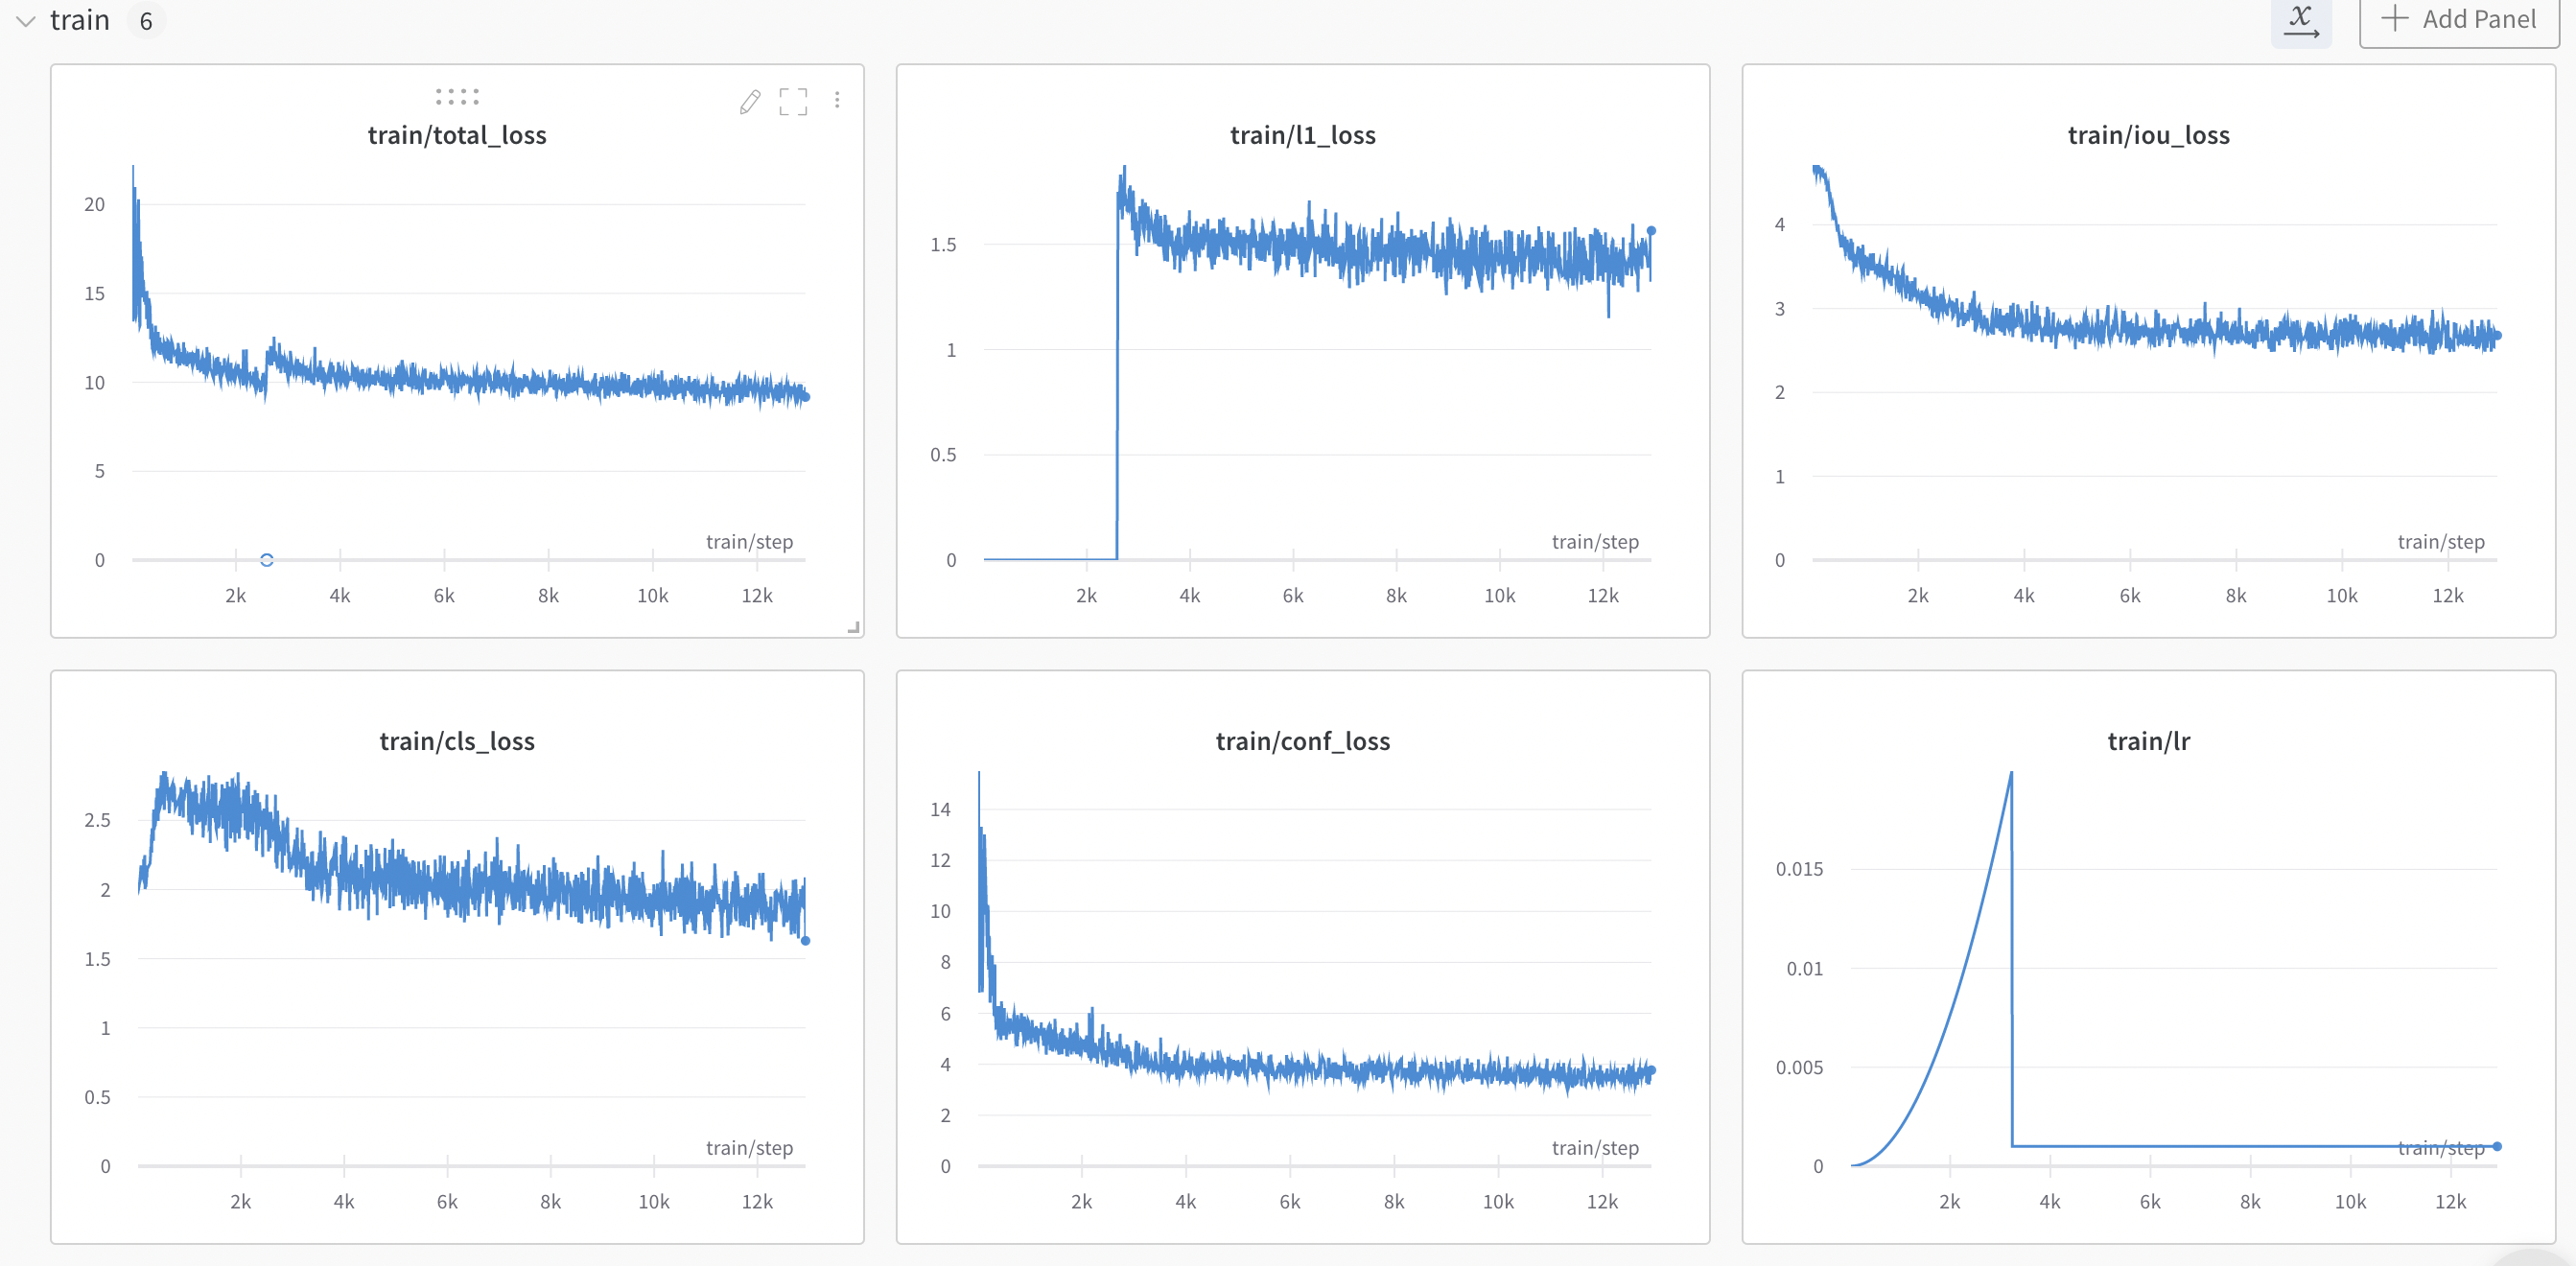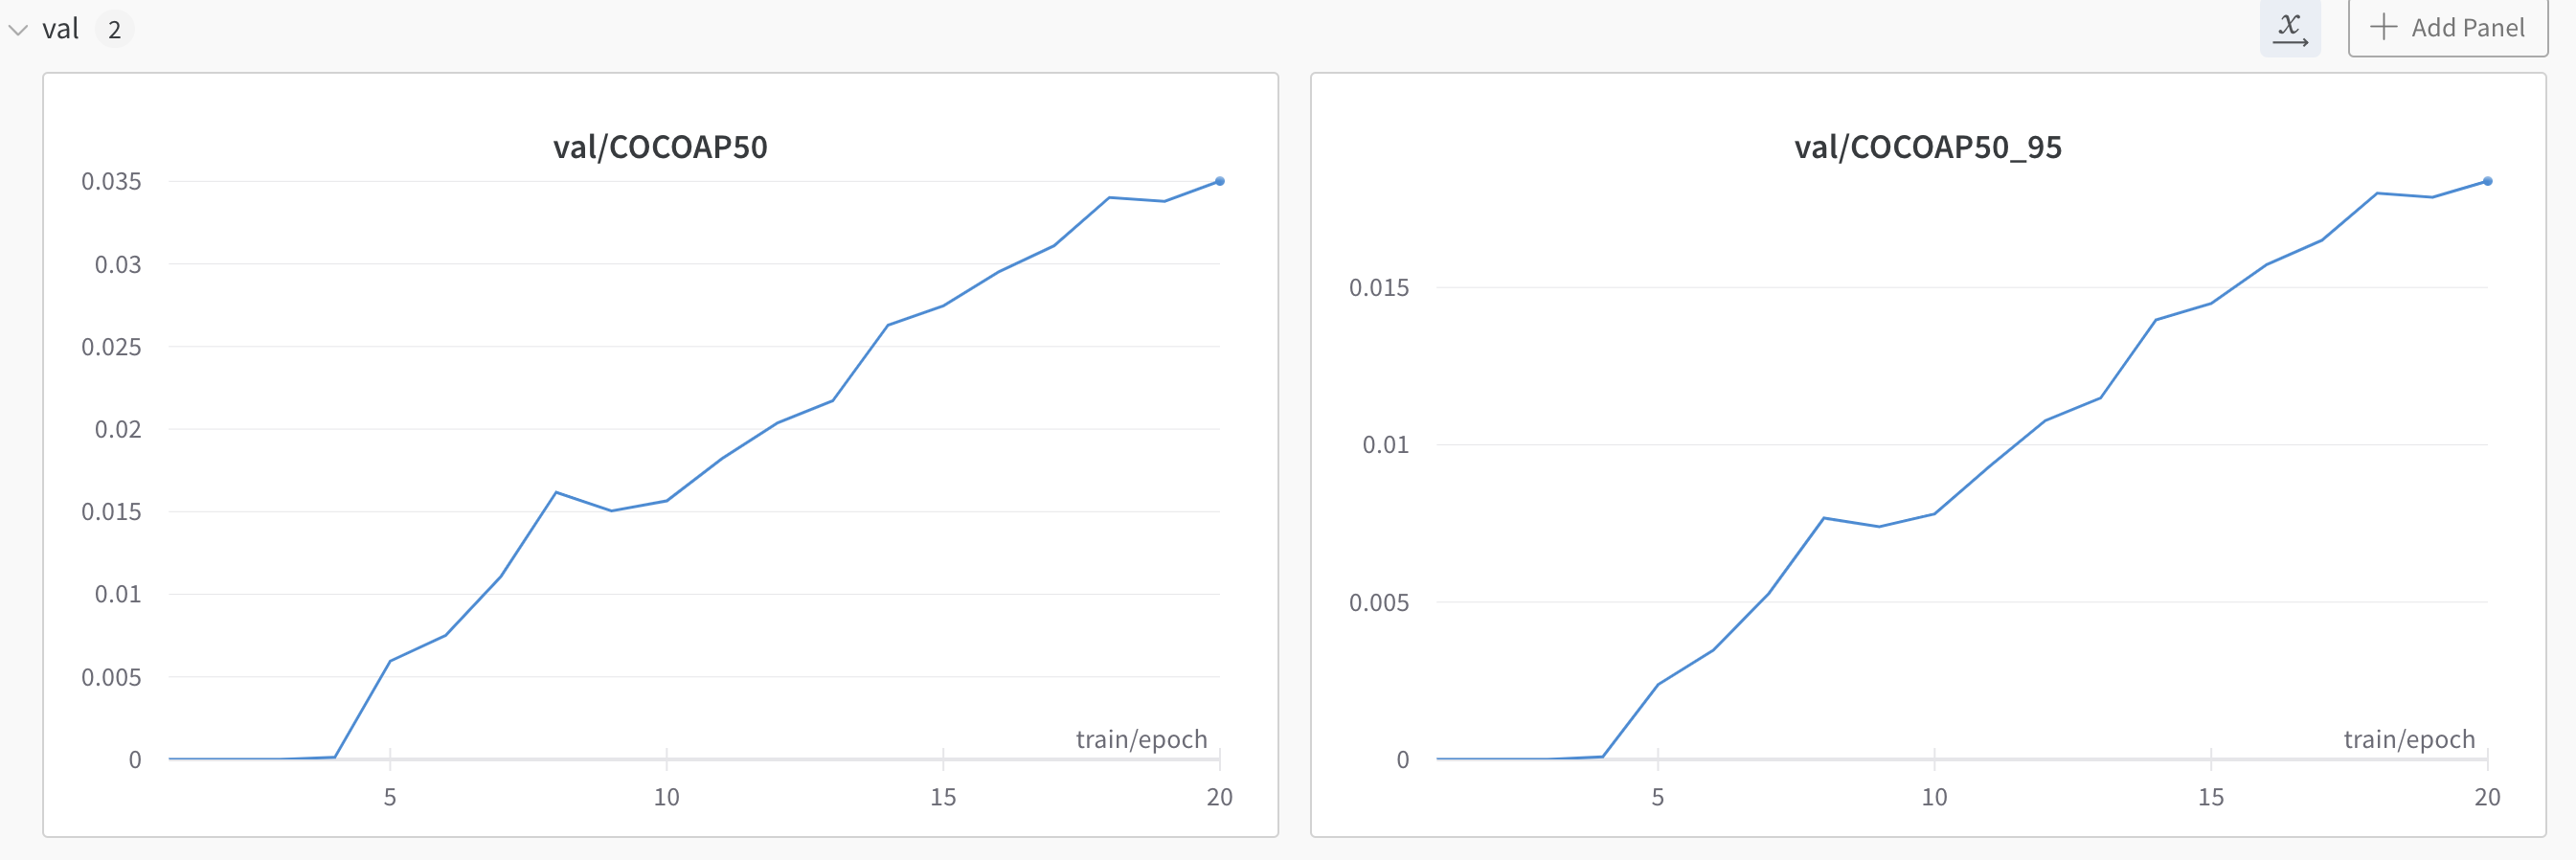

The checkpoints are logged to the wandb dashboard and tagged with epoch and if it is the best model. Along with that, metadata is also provided which consists of the optimizer state and the average precision on the validation set from that model.
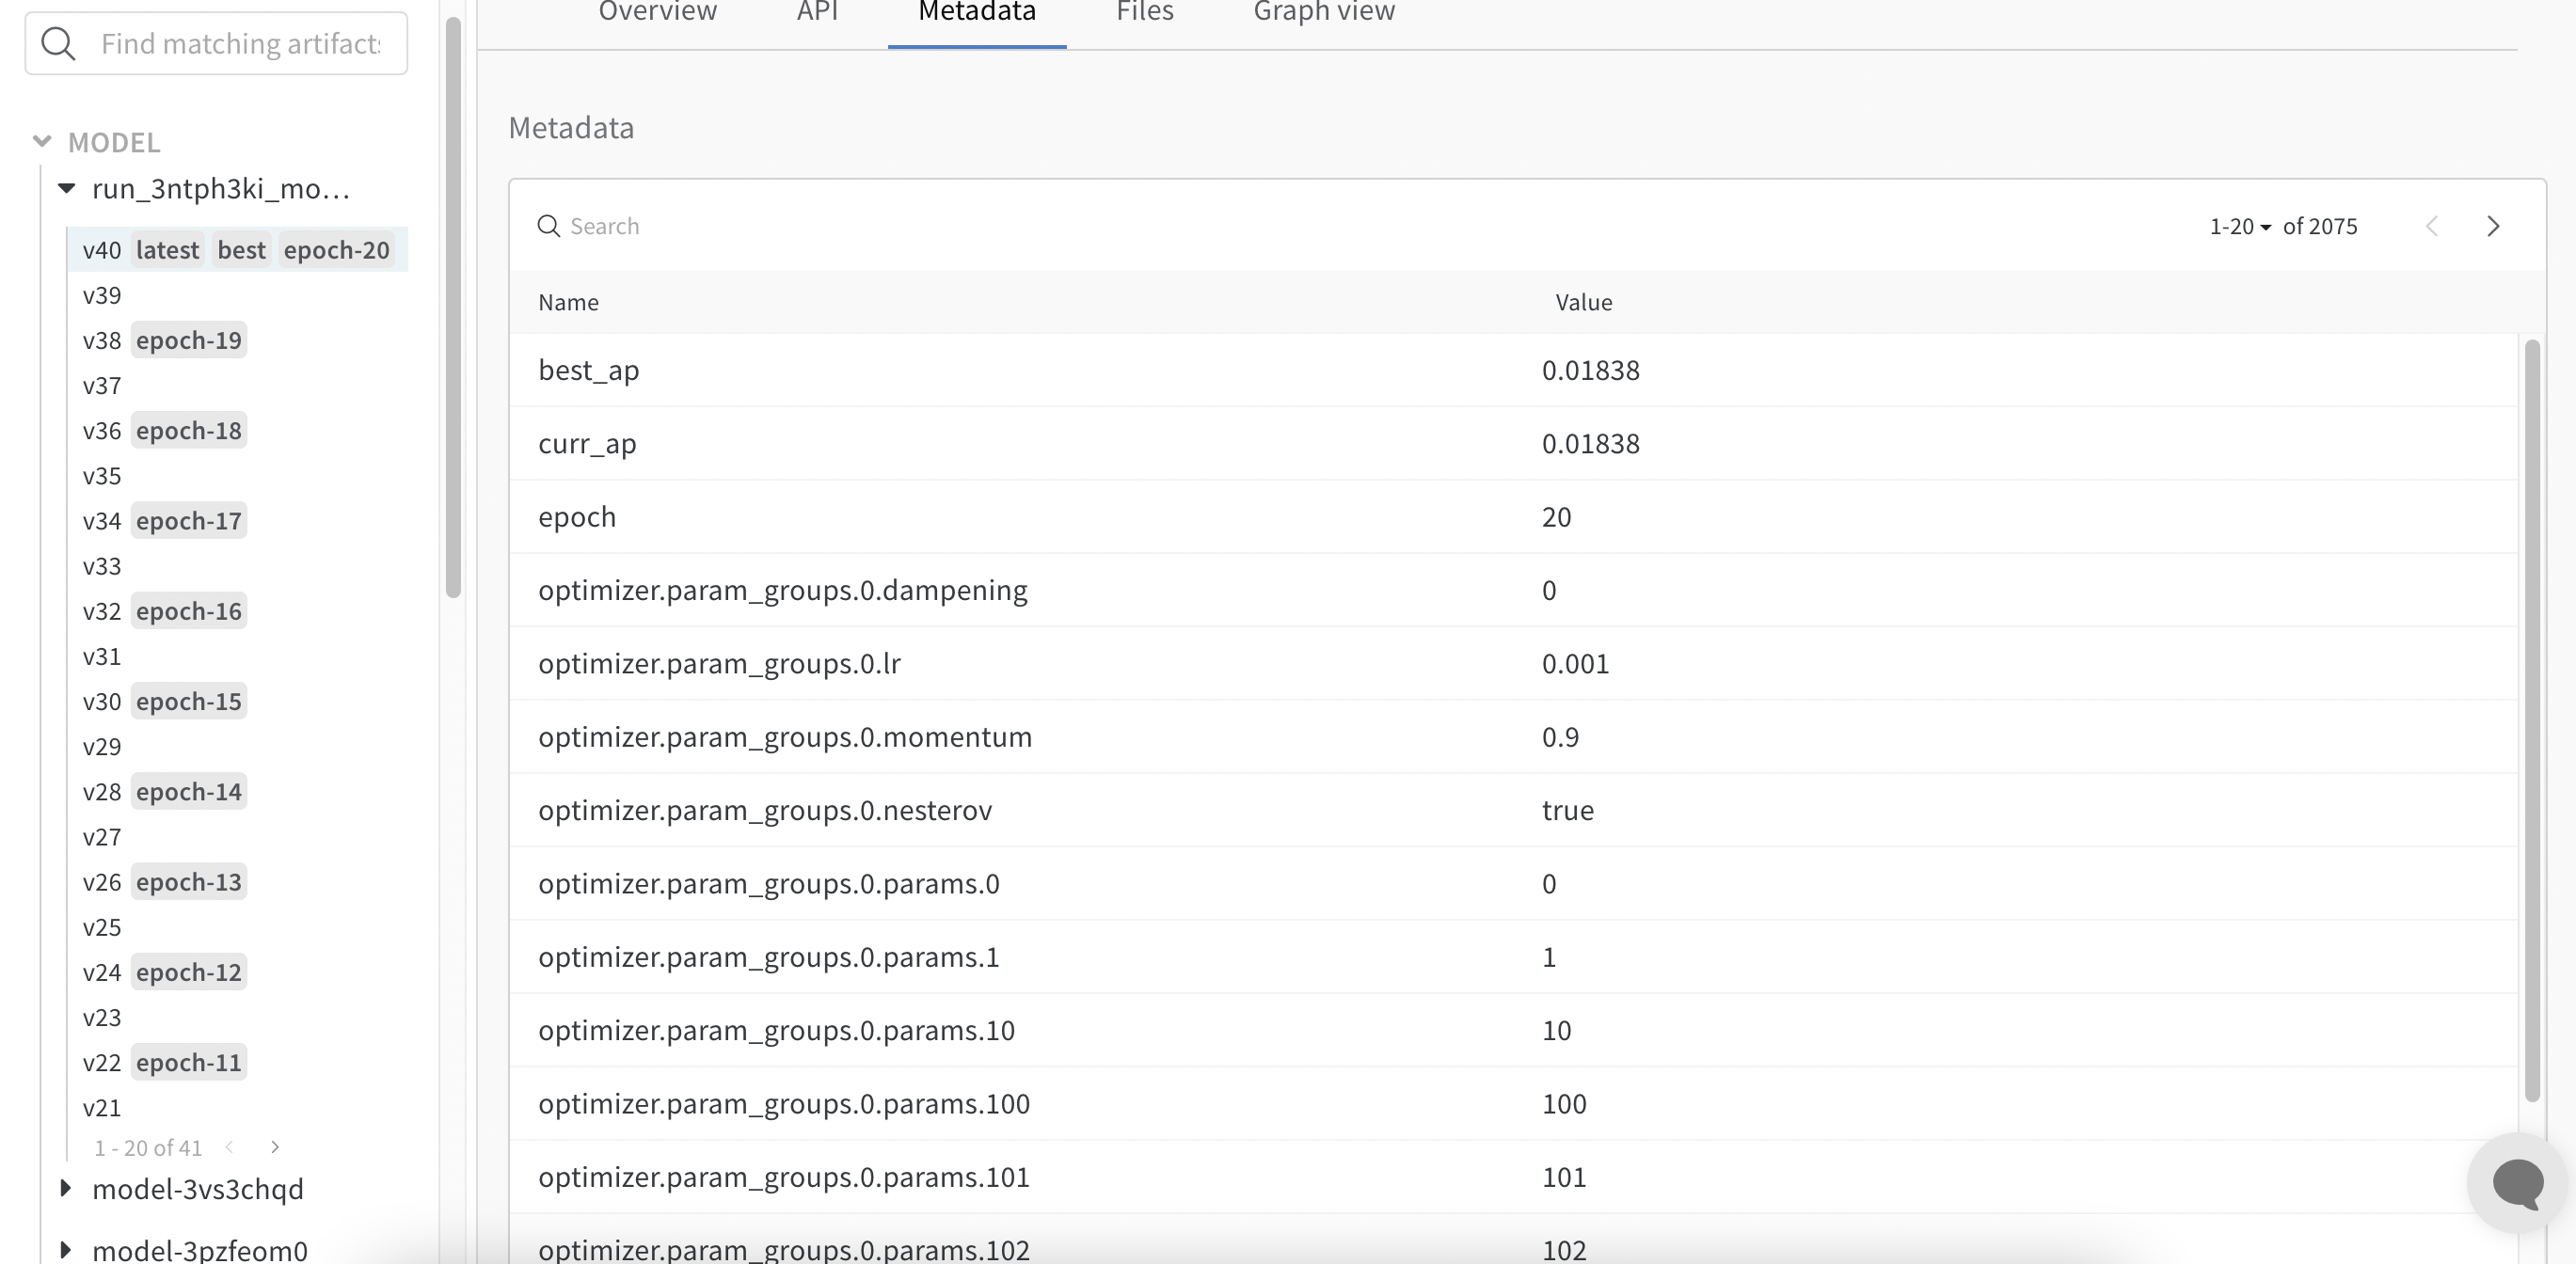

The first `num_eval_images` from the validation set are logged to the dasboard and the corresponding predictions are logged to the dashboard for visualization along with the confidence scores!

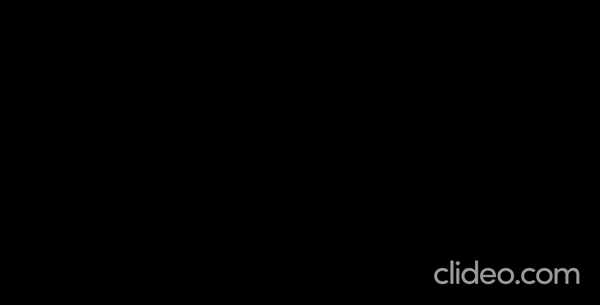

## Finetuning a pretrained model

You can also finetune a pretrained model on a [custom dataset.](https://github.com/manangoel99/YOLOX/blob/WandbLogger/docs/train_custom_data.md) In this case we continue working on the subset of COCO.

In [ ]:
api = wandb.Api()
artifact = api.artifact("manan-goel/YOLOX-coco/coco128:latest", type="dataset")
artifact_dir = artifact.download(root="/content")

In [ ]:
%%shell
cd /content
unzip /content/coco128.zip
mv /content/coco128 /content/YOLOX/datasets/COCO
cd /content/YOLOX

We will finetune the trained model from the previous step. To do that we download the logged artifact using the wandb API.

In [ ]:
import wandb
api = wandb.Api()
artifact = api.artifact("manan-goel/yolox-nano/run_3ntph3ki_model:best") # Fetches the model tagged as the best during fine-tuning
artifact.download() # Downloads the model

In [ ]:
%%shell
python tools/train.py -f exps/example/custom/nano.py -d 1 -b 64 --fp16 -o -c ./artifacts/run_3ntph3ki_model:v40/model_ckpt.pth --logger wandb \
    wandb-project yolox-nano-finetune \
    max_epoch 5 \
    print_interval 1 \
    eval_interval 1

## Using the trained model

The cell below runs detection using a pretrained model on a given image.

In [ ]:
%cd YOLOX
!wget https://github.com/Megvii-BaseDetection/YOLOX/releases/download/0.1.1rc0/yolox_s.pth
!python tools/demo.py image -n yolox-s -c yolox_s.pth --path assets/dog.jpg --conf 0.25 --nms 0.45 --tsize 640 --device gpu --save_result

Input             |  Annotated Image
:-------------------------:|:-------------------------:
![](https://raw.githubusercontent.com/Megvii-BaseDetection/YOLOX/main/assets/dog.jpg)  |  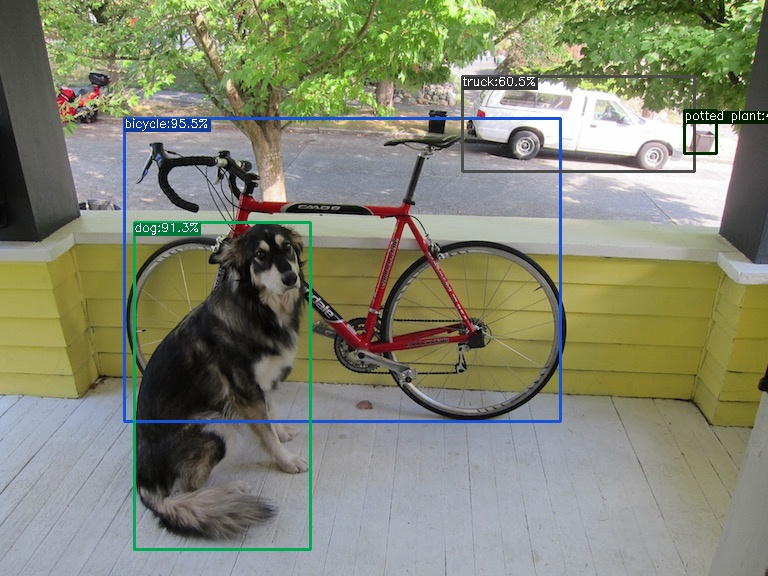

# Resources 📚


*  [W&B and YOLOX Documentation](https://docs.wandb.ai/guides/integrations/other/yolox) contains a few tips for taking most advantage of W&B.
*  More YOLOX documentation is available [here](https://yolox.readthedocs.io/en/latest/)



# Questions about W&B❓

If you have any questions about using W&B to track your model performance and predictions, please contact support@wandb.com